<a href="https://colab.research.google.com/github/Vintage-lavender/-/blob/main/4%EC%9B%94%EB%A7%88%EC%A7%80%EB%A7%89%EC%A3%BC_%EB%A6%AC%EB%B7%B0_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC%EB%B6%84%EB%A5%98_%ED%8C%8C%EC%9D%B4%EC%B0%A8%ED%8A%B8_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시각화 참고: https://neptune.ai/blog/plotly-python-tutorial-for-machine-learning-specialists


In [1]:
import pandas as pd
!pip install datatable  #엑셀 파일 및 대용량 데이터를 가져오기 위해 필요한 datatable 모듈을 설치합니다
import datatable as dt

     |████████████████████████████████| 96.9 MB 97 kB/s 


In [2]:
#카테고리 파일 불러오기
category_df = pd.read_csv('/content/drive/MyDrive/review_data_20220316/dogpre.gd_category_202203161107.csv',encoding='utf-8')

#상품번호 및 카테고리 파일(dogpre.gd_goods_link_202203161106) 불러오기
goods_link_df = pd.read_csv('/content/drive/MyDrive/review_data_20220316/dogpre.gd_goods_link_202203161106.csv',encoding='utf-8')

#상품번호 및 실제 리뷰 파일(dogpre.gd_goods_review_202203160949) 불러오기
datatable_df = dt.fread('/content/drive/MyDrive/review_data_20220316/dogpre.gd_goods_review_202203160949.csv',encoding='utf-8')
goods_review_df = datatable_df.to_pandas()

카테고리 분포보기

In [ ]:
#모든 카테고리 추출
#wholecate_dic = category_df.set_index('category').T.to_dict('list')
#print(wholecate_dic)

In [7]:
#모든 카테고리 걔수 확인
len(category_df)

127

In [3]:
#상위 카테고리 20개 추출(상위 카테고리 번호는 두자리--> 하위 카테고리는 상위카테고리*1000대의 숫자)
super_category = category_df[category_df['category']<100]

supcate_dic = super_category.set_index('category').T.to_dict('list') #카테고리 코드를 key로 하고 다른 변수들로 이루어진 리스트를 value로 갖는 딕셔너리 생성
supcate_dic[0]=[None, '분류안됨'] #유효하지 않은 하위 카테고리에 부여될 상위 카테고리 0 생성

supcate_dic #딕셔너리 출력 결과: key는 상위카테고리 코드, value[1]은 상위카테고리 이름이 됨

{0: [None, '분류안됨'],
 16: [128, '사은품', 15, 1, 0, nan, 0, nan, nan, 0],
 36: [364,
  '사료',
  0,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/036.png',
  0,
  nan,
  nan,
  0],
 37: [370, '치아', 16, 1, 0, nan, 0, nan, nan, 0],
 38: [377,
  '건강관리',
  3,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/038.png',
  0,
  nan,
  nan,
  0],
 39: [386,
  '위생/배변',
  4,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/039.png',
  0,
  nan,
  nan,
  0],
 40: [391,
  '미용/목욕',
  5,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/040.png',
  0,
  nan,
  nan,
  0],
 41: [401,
  '급식기/급수기',
  6,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/041.png',
  0,
  nan,
  nan,
  0],
 42: [410,
  '하우스/울타리',
  7,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/042.png',
  0,
  nan,
  nan,
  0],
 43: [417,
  '이동장',
  8,
  0,

In [8]:
#상위 카테고리 개수 확인
len(supcate_dic)

21

In [4]:
#상품 번호가 중복되는 경우 확인: 15449개
a = goods_link_df[goods_link_df.duplicated(['goodsno'])]#.sum()
len(a)
#b = a[a['supcate']==0] #상품번호가 중복이고 카테고리가 분류되지 않은 경우: 15394
#c = a[a['supcate']!=0] #상품번호가 중복이고 카테고리가 분류된 경우: 55
#print(len(b))
#c

15449

In [5]:
goods_link_df=goods_link_df.drop_duplicates(['goodsno']) #상품번호 중복일 경우 데이터 제거
goods_link_df

,sno,goodsno,category,sort,hidden
0,4,4,1001,-1185200690,1
1,9,9,1001,-1185200694,1
2,11,11,1001,-1185200695,1
3,15,15,1002,0,1
4,18,18,1002,0,1
...,...,...,...,...,...
67598,170566,88175,39002,0,0
67599,170570,88266,40006,0,0
67600,170573,88241,51003,0,0
67601,170572,88230,38004,0,0


In [9]:
#모든 상품의 카테고리 분포 보기
'''
전체 카테고리는 123개 항목으로 이루어져 있으므로, 상품을 분류하는 기준으로 사용하기에는 너무 많아 적합하지 않다고 판단
=> 전체 카테고리 대신 상위 카테고리 21개 항목(sipcate_dic에 정의되어 있음)으로 분류를 시행하기로 결정
'''

#하위 카테고리를 모두 상위 카테고리로 변경
goods_link_df['supcate']=0 #상위 카테고리 column을 생성하고 모든 값을 0으로 초기화

for i in supcate_dic: #모든 상위 카테고리 코드에 대하여 반복
  #상품의 카테고리가 상위 카테고리 그 자체일 경우: 현재 카테고리를 supcate열의 값에 할당
  goods_link_df.loc[goods_link_df['category']==i,'supcate'] = i 
  #상품의 카테고리가 상위 카테고리에 속하는 하위 카테고리일 경우: 상위 카테고리를 supcate열의 값에 할당
  goods_link_df.loc[(goods_link_df['category']>=i*1000) & (goods_link_df['category']<(i+1)*1000),'supcate'] = i 
  
goods_link_df

,sno,goodsno,category,sort,hidden,supcate
0,4,4,1001,-1185200690,1,0
1,9,9,1001,-1185200694,1,0
2,11,11,1001,-1185200695,1,0
3,15,15,1002,0,1,0
4,18,18,1002,0,1,0
...,...,...,...,...,...,...
67598,170566,88175,39002,0,0,39
67599,170570,88266,40006,0,0,40
67600,170573,88241,51003,0,0,51
67601,170572,88230,38004,0,0,38


In [11]:
#상위 카테고리에 해당하는 상품 개수 카운트하기
cate_counting = goods_link_df['supcate'].value_counts() #모든 상품의 상위 카테고리 값과 그 개수를 pandas series 자료형으로 반환
'''
supcate_dic에 저장된 상위 카테고리 코드는 21개 항목이지만 실제 상품이 사용된 항목은 15개임을 확인
상품 중 카테고리가 분류되지 못한 경우가 38.9%로 가장 많았음
'''
cate_counting

0     20272
44    11243
51     4344
45     3613
36     2891
42     2710
47     1193
40     1168
43      997
41      881
16      839
39      835
38      826
58      163
48      107
37       72
Name: supcate, dtype: int64

In [12]:
#모든 상품의 카테고리를 분류한 결과를 파이차트로 시각화하여 카테고리 별 비율 확인
import plotly.express as px
import plotly.graph_objects as go

labels = [supcate_dic[i][1] for i in cate_counting.index] #카테고리 코드의 이름을 label로 받음
values = cate_counting.values #카테고리 코드 별 빈도수를 value로 받음

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.2)]) #파이차트 생성

fig.update_layout(title_text=f"<b>전체 상품({len(goods_link_df)}개) 카테고리 비율(중복제거)</b>") #파이차트 제목
#fig.write_image("/content/drive/MyDrive/review_data_20220316/전체상품카테고리비율(중복제거).png")
fig.show() #파이차트 출력

## 전체 후기의 카테고리 비율 보기

In [14]:
#전체 후기 개수 확인
len(goods_review_df)

4490421

In [27]:
'''
전체 후기가 어떤 카테고리에 속하는 상품에 대한 후기인지를 분류하기 위하여
전체 후기 데이터프레임의 상품번호와 상품번호-카테고리 연결 데이터프레임의 상품번호를 왼쪽 외부조인 함.
'''
#전체 후기 데이터프레임에서 필요한 정보인 상품번호, 후기 제목, 후기 본문, 평점 column만 가져옴
goods_review_df=goods_review_df[['goodsno','subject','contents','point']]
#상품번호-카테고리 연결 데이터프레임에서 필요한 정보인 상품번호, 카테고리 코드, 카테고리 코드의 상위 카테고리 코드 column만 가져옴
cate_df = goods_link_df[['goodsno','category','supcate']]
#전체 후기 데이터프레임과 상품번호-카테고리 연결 데이터프레임을 상품번호를 key로 왼쪽 외부조인
review_cate = pd.merge(goods_review_df, cate_df, left_on='goodsno', right_on='goodsno', how='left')

In [28]:
#전체 후기에 대하여 어떤 카테고리에 속하는 상품에 대한 후기인지 분류한 결과 출력
review_cate 

,goodsno,subject,contents,point,category,supcate
0,37634,강아지들이 좋아라해요!~,이거 병원에서 1000원이던데~!\r\n 이게 원래는 사료라던데!~? 강쥐들이 죠아...,5.0,51003.0,51.0
1,37634,완전싸네요!!~,이거 집 앞 슈퍼에서 750원에 팝니당~\r\n양이 더 많을줄 알았는데 같네요\r\...,5.0,51003.0,51.0
2,37634,미끼용으로 좋습니다!! 추천!,사료줄때 ...몇개 넣어서주면 좋아요 ~^^...그래서 이번에 구매할때 이고 살려구...,5.0,51003.0,51.0
3,37634,잘먹습니다^-^,간식도 같은거 먹으면 금새 싫증내는데\r\n이건 물리지 않는지 잘먹어여,5.0,51003.0,51.0
4,2066,자주 간식을 줘야한다면 추천 ^^,우리강쥐는간식을항상줘야말을들어서 간식감당을못했거든요 \r\n근데 50p나되니 하루에...,5.0,51008.0,51.0
...,...,...,...,...,...,...
4490416,19139,아주 좋아해요,환장하고 먹어요 진짜 좋아해요,5.0,51008.0,51.0
4490417,57301,잘먹어요,너무 잘먹어서 자주 시켜요,5.0,51002.0,51.0
4490418,19142,아주 좋아해요,넘나 좋아해요 1등이에요,5.0,51002.0,51.0
4490419,46856,잘먹어요,유산균 함유된 스틱이라고 해서 주문해 봤고..\n딱딱하지 않아서 좋아요..\n멍이도...,5.0,51002.0,51.0


In [29]:
#카테고리가 분류되지 않은 상품 후기 개수: 12729개
review_cate['supcate'].isnull().sum()

12729

In [30]:
#카테고리가 분류되지 못한 후기의 상위 카테고리(supcate)를 0으로 설정
review_cate.loc[review_cate['supcate'].isnull(),'supcate']=0 

In [31]:
#상위 카테고리에 해당하는 후기 개수 카운트하기
rcate_counting = review_cate['supcate'].value_counts() #후기 데이터프레임에서 사용된 상위카테고리 코드와 그 개수를 pandas series 자료형으로 반환
rcate_counting #상위 카테고리 사용 횟수 출력

51.0    1842277
0.0      592539
36.0     402884
39.0     359292
47.0     312004
38.0     289902
40.0     271309
41.0     139832
45.0      90856
42.0      74694
44.0      68198
37.0      11459
43.0      11445
48.0       9970
58.0       7802
16.0       5958
Name: supcate, dtype: int64

In [32]:
#전체 후기 카테고리 비율

labels = [supcate_dic[i][1] for i in rcate_counting.index] #후기 데이터프레임에서 사용된 상위 카테고리 코드의 이름을 labels에 넣어줌
values = rcate_counting.values #후기 데이터프레임에서 사용된 상위 카테고리 코드의 개수를 values에 넣어줌

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.2)]) #전체 후기 카테고리 비율 파이차트 생성
    
fig.update_layout(title_text=f"<b>전체 후기({len(review_cate)}개) 카테고리 비율(중복제거)</b>") #파이 차트 제목 생성
#plotly.offline.plot(fig,filename="/content/drive/MyDrive/review_data_20220316/전체후기카테고리비율(중복제거).html")
fig.show() #파이차트 출력

##카테고리 별 평점 비율 보기

In [33]:
#평점별 후기 개수 카운트하기
point_counting = review_cate['point'].value_counts() #전체 후기의 point 열에서 등장한 평점과 평점 별 후기 개수를 pandas series 자료형으로 반환
point_counting

5.0    3139856
4.0     885561
3.0     327637
2.0      83278
1.0      54082
0.0          7
Name: point, dtype: int64

In [34]:
#평점이 오류가 난 경우(평점은 1~5사이의 값을 가짐): 7개
review_cate[review_cate['point']==0] #긍정 데이터임을 확인

,goodsno,subject,contents,point,category,supcate
2928878,34988,쏘아베 물병,굿,0.0,41004.0,41.0
3819777,55404,좋아요,강아지가 좋아합니다.,0.0,51008.0,51.0
3819779,37853,좋아요,강아지가 좋아합니다.,0.0,51002.0,51.0
3819780,53358,좋아요,강아지가 좋아합니다.,0.0,51006.0,51.0
3821375,80269,좋아요,잘먹습니다 좋아요~~ !!,0.0,51003.0,51.0
3834090,20442,좋아요,강아지가 좋아합니다.,0.0,51008.0,51.0
3834091,55401,좋아요,강아지가 좋아합니다.,0.0,51008.0,51.0


In [36]:
#평점이 1~5사이의 값을 갖는 경우: 4490414개
review_cate = review_cate[review_cate['point']!=0] #전체 후기 데이터프레임을 point값이 1~5사이의 값인 데이터만 포함된 데이터프레임으로 수정
review_cate

,goodsno,subject,contents,point,category,supcate
0,37634,강아지들이 좋아라해요!~,이거 병원에서 1000원이던데~!\r\n 이게 원래는 사료라던데!~? 강쥐들이 죠아...,5.0,51003.0,51.0
1,37634,완전싸네요!!~,이거 집 앞 슈퍼에서 750원에 팝니당~\r\n양이 더 많을줄 알았는데 같네요\r\...,5.0,51003.0,51.0
2,37634,미끼용으로 좋습니다!! 추천!,사료줄때 ...몇개 넣어서주면 좋아요 ~^^...그래서 이번에 구매할때 이고 살려구...,5.0,51003.0,51.0
3,37634,잘먹습니다^-^,간식도 같은거 먹으면 금새 싫증내는데\r\n이건 물리지 않는지 잘먹어여,5.0,51003.0,51.0
4,2066,자주 간식을 줘야한다면 추천 ^^,우리강쥐는간식을항상줘야말을들어서 간식감당을못했거든요 \r\n근데 50p나되니 하루에...,5.0,51008.0,51.0
...,...,...,...,...,...,...
4490416,19139,아주 좋아해요,환장하고 먹어요 진짜 좋아해요,5.0,51008.0,51.0
4490417,57301,잘먹어요,너무 잘먹어서 자주 시켜요,5.0,51002.0,51.0
4490418,19142,아주 좋아해요,넘나 좋아해요 1등이에요,5.0,51002.0,51.0
4490419,46856,잘먹어요,유산균 함유된 스틱이라고 해서 주문해 봤고..\n딱딱하지 않아서 좋아요..\n멍이도...,5.0,51002.0,51.0


In [37]:
#평점별 후기 개수 카운트하기
point_counting = review_cate['point'].value_counts() #전체 후기의 point 열에서 등장한 평점과 평점 별 후기 개수를 pandas series 자료형으로 반환
point_counting

5.0    3139856
4.0     885561
3.0     327637
2.0      83278
1.0      54082
Name: point, dtype: int64

In [38]:
#전체 후기 평점 비율
labels = [i for i in point_counting.index] #평점을 labels로 넣음
values = point_counting.values #평점의 개수를 values로 넣음

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.2)]) #파이차트 생성
    
fig.update_layout(title_text=f"<b>이상치 제거 후 후기({len(review_cate)}개) 평점 비율</b>") #파이차트 제목 생성
fig.show() #파이 차트 출력

In [39]:
#평점별 후기 보기
#후기 평점이 4점일 경우 데이터프레임
review_cate[review_cate['point']==4][['point','contents']]

,point,contents
7,4.0,"사료 15Kg 짜리 주문햇는데, 좀 늦는다고 전화주셔서\r\n배송은 늦엇지만, 그래..."
10,4.0,개띠도 아닌데 이거 보니까 맥주가 마시고 싶어지더만요\r\nㅋㅋㅋ 치즈도 쏙쏙 박혀...
13,4.0,"신발사이즈가 참애매모호해서,,\r\n첨엔,, 2호를 주문했는데,,ㅠ,ㅠ\r\n좀작아..."
22,4.0,딱딱해서 일반 케어껌보단 오래가요\r\n
34,4.0,우리강아지는 비스켓은 안먹던데 요건먹네여^^\r\n도기맨 먹인적이있는데 단단해서 안...
...,...,...
4490346,4.0,냄새도 없었구 진짜 금방 먹어 버리더라구요\n탈도 없어서 다행이구요\n
4490348,4.0,배송빠르고 아이들이 너무 좋아해요
4490349,4.0,배송빠르고 아이들이 너무 좋아해요.
4490350,4.0,배송빠르고 아이들이 너무 좋아해요.


In [40]:
#후기 평점이 3점일 경우 데이터프레임
review_cate[review_cate['point']==3][['point','contents']]

,point,contents
24,3.0,약용샴푸라서 그런가요?\r\n그래도 향기가 좀 나면 좋을텐데 약냄새밖에 안나는거 같...
44,3.0,야채참치를 떠올리게하는 상품이구요.\r\n전 스프라구 해도 국물까지먹이진않구 그냥 ...
47,3.0,우리 아이가 사용하는 샴푸인데\r\n우선 향기는 좋아요 \r\n하지만 털이 뽀야게 ...
53,3.0,가격도 좋구 저렴해서 쉽게먹이기는 알맞은거같아요.\r\n\r\n
54,3.0,오티클렌스라구 노란색통인데 이건냄새가 좀독하다구하더군요. 이것도 유명하구 또 나머지...
...,...,...
4490332,3.0,그냥 그래요 잘안먹어요
4490335,3.0,너무 조아하는 간식인데 식탐이 많은 아이라 그냥 상켜버리기일쑤에요
4490369,3.0,입짧은 우리애는 잘안먹어요\n한통샀으면 눈물흘릴뻔...
4490377,3.0,안씹어요 하나씩 테스트해볼수있어서 좋았어요


##워드크라우드 생성

In [50]:
#한글 전처리 모델을 위한 셀
#한국어 NLP를 위한 ennjeon 라이브러리 설치합니다.
!pip install  konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
from konlpy.tag import Mecab
m = Mecab()

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 41.7 MB/s 
Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,498 kB]

In [51]:
#후기 데이터프레임(review_cate) 전처리
import numpy as np
import re

def kextract(s):  #후기에서 한글만 뽑아 전처리하는 함수 작성
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')  #후기에서 한글만 추출
  result = hangul.sub(' ',str(s)) #한글이 아닌 문자일 경우 공백으로 대체
  return result

#함수 확인
kextract('강아지가 클때까지 먹이려고 큰거 샀는데..\r\n다른 쇼핑몰 보다 싸서 좋네요~\r...😂')

'강아지가 클때까지 먹이려고 큰거 샀는데 다른 쇼핑몰 보다 싸서 좋네요 '

In [63]:
#모든 후기에서 subject열, content열, point열 항목만 가져오기
dataframe = review_cate[['subject','contents','point','supcate']]

#후기의 제목과 본문에서 한글만 추출
dataframe['contents'] = [kextract(s) for s in dataframe['contents']]
dataframe['subject'] = [kextract(s) for s in dataframe['subject']]
dataframe = dataframe.dropna(subset=['contents'], axis=0).reset_index(drop=True) #후기 내용이 NULL값인 행 제거

dataframe.isnull().sum()  #null값이 있는 열 확인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



subject     0
contents    0
point       0
supcate     0
dtype: int64

In [64]:
dataframe #한글을 제외한 특수문자를 제거하는 전처리 과정을 거친 전체 후기 데이터프레임 확인

,subject,contents,point,supcate
0,강아지들이 좋아라해요,이거 병원에서 원이던데 이게 원래는 사료라던데 강쥐들이 죠아라하죠 의사샘말에따...,5.0,51.0
1,완전싸네요,이거 집 앞 슈퍼에서 원에 팝니당 양이 더 많을줄 알았는데 같네요 요즘 울집 강쥐...,5.0,51.0
2,미끼용으로 좋습니다 추천,사료줄때 몇개 넣어서주면 좋아요 그래서 이번에 구매할때 이고 살려구요 ㅎㅎㅎㅎ,5.0,51.0
3,잘먹습니다,간식도 같은거 먹으면 금새 싫증내는데 이건 물리지 않는지 잘먹어여,5.0,51.0
4,자주 간식을 줘야한다면 추천,우리강쥐는간식을항상줘야말을들어서 간식감당을못했거든요 근데 나되니 하루에 번줘도...,5.0,51.0
...,...,...,...,...
4490409,아주 좋아해요,환장하고 먹어요 진짜 좋아해요,5.0,51.0
4490410,잘먹어요,너무 잘먹어서 자주 시켜요,5.0,51.0
4490411,아주 좋아해요,넘나 좋아해요 등이에요,5.0,51.0
4490412,잘먹어요,유산균 함유된 스틱이라고 해서 주문해 봤고 딱딱하지 않아서 좋아요 멍이도 잘먹구요,5.0,51.0


In [65]:
#한글 추출 및 결측치 제거 이후 후기 개수 확인
print(len(review_cate),"->",len(dataframe)) #변화 없음

4490414 -> 4490414


In [55]:
#평점별 워드 크라우드 생성을 위한 모듈 설치 및 불러오기
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import nltk

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 1683, in _parseNoCache
    loc, tokens = self.parseImpl(instring, preloc, doActions)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 4269, in parseImpl
    raise maxException
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 4254, in parseImpl
    ret = e._parse(instring, loc, doActions)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.p

In [56]:
#워드클라우드 생성을 위한 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

{f for f in sys_font if 'Nanum' in f}

Selecting previously unselected package fonts-nanum.
(Reading database ... 155488 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


{'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/

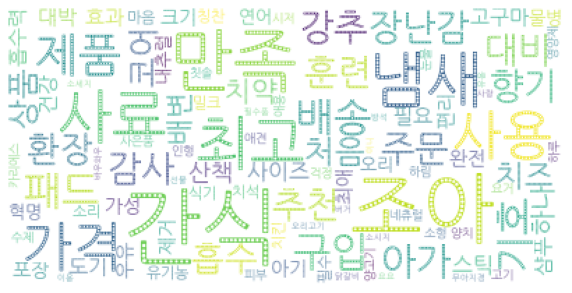

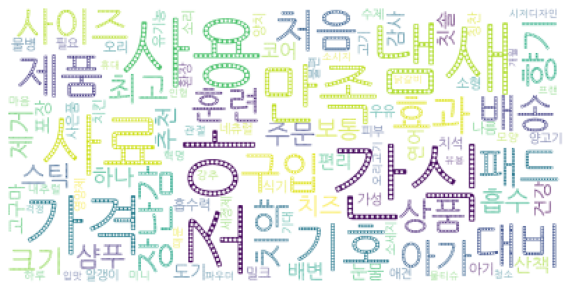

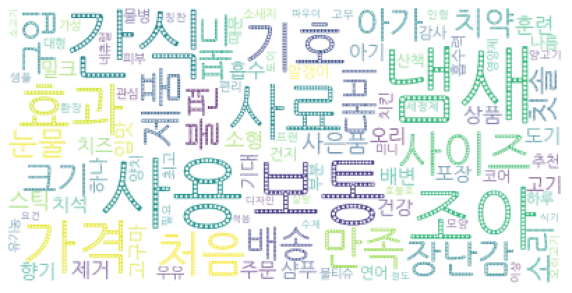

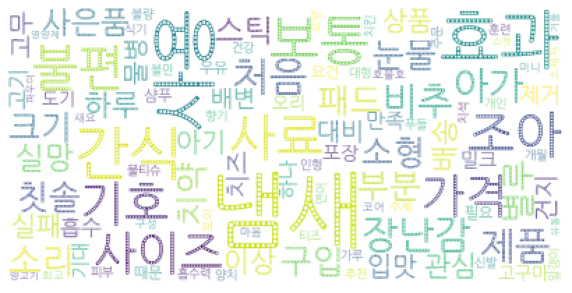

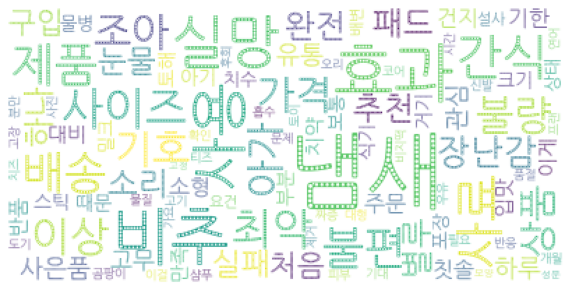

In [57]:
#평점 별 빈도수 상위 100개 단어 추출하여 워드클라우드 생성

for i in range(5,0,-1):
  current_point = dataframe[dataframe['point']==i] #dataframe(전처리된 후기 데이터프레임)에서 평점이 i인 데이터만 추출
  subject_list = current_point['subject'].tolist() #제목만 리스트로
  content_list = current_point['contents'].tolist() #내용만 리스트로

  #후기들에 등장하는 단어들의 빈도수 확인을 위해 명사 추출
  dataset = []
  stopwords = ['구매','거','것','때','번','아이','중',
              '수','생각','데','강','쥐','이거','게','애','저희','듯',
              '후','전','요향','맘','건','제','나','이건','년','저','대통령','우리','이',
              '만','이번','편','건데','이걸로','편','개','다음','애기','집','견','내','강아지','이것','시','후기']  
              #우리: 소유격, 개: 진돗개라는 반복적인 리뷰에만 등장하는 단어, 집: '우리집 강아지'같은 단어에서 사용
              #강아지: 사용되는 빈도수가 너무 높아 제외

  for r in range(len(current_point)):
    tmp = subject_list[r]+' '+subject_list[r] #한 개의 후기의 제목과 내용을 하나의 문자열로 만들어 삽입
    tokens = m.nouns(tmp) #문자열에서 명사만 추출
    tokens = [t for t in tokens if (t not in stopwords and len(t)!=1)]  #토큰이 제외 단어에 포함되어 있지 않거나 한글자가 아닐때만 tokens에 넣어줌
    dataset += tokens #현재 후기에서 추출된 명사들을 전체 명사 리스트인 dataset 리스트에 넣어줌

  text = nltk.Text(dataset) # text에 저장하고
  count = 100
  topWord = text.vocab().most_common(count) #빈도수 상위 100개 단어 추출
  

  wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',background_color="white", max_font_size=60) #워드클라우드 생성
  cloud = wc.generate_from_frequencies(dict(topWord))

  plt.figure(figsize=(10, 8))
  plt.axis('off')
  plt.imshow(cloud)
  plt.show()

  #cloud.to_file(f"/content/drive/MyDrive/review_data_20220316/평점별 워드클라우드/평점{i}.png") #평점별로 생성한 워드클라우드 파일로 저장

In [58]:
#전체 후기 데이터프레임에서 평점이 0점인 데이터를 제거하는 등의 전처리 과정을 거쳤으므로 supcate값과 개수를 다시 확인
rcate_counting = review_cate['supcate'].value_counts() #전처리된 후기의 supcate 열에서 등장한 카테고리 코드와 카테고리 코드별 후기 개수를 pandas series 자료형으로 반환
rcate_counting #평점0점은 51번 카테고리에서 6개, 41번 카테고리에서 1개가 발생한 것을 알 수 있음

51.0    1842271
0.0      592539
36.0     402884
39.0     359292
47.0     312004
38.0     289902
40.0     271309
41.0     139831
45.0      90856
42.0      74694
44.0      68198
37.0      11459
43.0      11445
48.0       9970
58.0       7802
16.0       5958
Name: supcate, dtype: int64

In [67]:
#위의 결과를 딕셔너리형으로 변환(표시하기 위하여)
rcate_counting=rcate_counting.to_dict() 
rcate_counting

{0.0: 592539,
 16.0: 5958,
 36.0: 402884,
 37.0: 11459,
 38.0: 289902,
 39.0: 359292,
 40.0: 271309,
 41.0: 139831,
 42.0: 74694,
 43.0: 11445,
 44.0: 68198,
 45.0: 90856,
 47.0: 312004,
 48.0: 9970,
 51.0: 1842271,
 58.0: 7802}

In [69]:
#카테고리별로 긍정적, 부정적 후기 분류
for c in rcate_counting: #카테고리 번호와 빈도수 받기
  #한 카테고리 내에서의 평점 비율
  c_dataframe = dataframe[dataframe['supcate']==c] #카테고리 코드가 c인 데이터만 추출
  c_counting = c_dataframe['point'].value_counts() #추출된 데이터프레임의 평점값 및 빈도수 확인
  labels = [i for i in c_counting.index]
  values = c_counting.values

  fig = go.Figure(
      data=[go.Pie(labels=labels, values=values, hole=0.2)])
      
  fig.update_layout(title_text=f"<b>'{supcate_dic[c][1]}'카테고리 후기({rcate_counting[c]}개) 평점 비율</b>")
  #plotly.offline.plot(fig,filename="/content/drive/MyDrive/review_data_20220316/전체후기카테고리비율(중복제거).html")
  fig.show()